# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import models
from keras import layers

In [2]:
url = 'https://raw.githubusercontent.com/SulemanJaved/piaic-quarter2-assignments/master/quarter2_dlAssignment/datasets/CarPrice_Assignment.csv'
data = pd.read_csv(url)
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.shape

(205, 26)

In [4]:
pd.isnull(data).any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype'] = labelencoder.fit_transform(data['fueltype'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem'] = labelencoder.fit_transform(data['fuelsystem'])

In [7]:
data['doornumber'] = data['doornumber'].map({'two':2, 'four':4})

In [8]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
data1 = data[['drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
              'curbweight', 'enginesize', 'boreratio', 'horsepower', 'price', ]]
print(data1.shape)
data1.head()

(205, 10)


,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
0,2,0,88.6,168.8,64.1,2548,130,3.47,111,13495.0
1,2,0,88.6,168.8,64.1,2548,130,3.47,111,16500.0
2,2,0,94.5,171.2,65.5,2823,152,2.68,154,16500.0
3,1,0,99.8,176.6,66.2,2337,109,3.19,102,13950.0
4,0,0,99.4,176.6,66.4,2824,136,3.19,115,17450.0


In [10]:
s = (data1.loc[:, data1.columns != 'price']) 
l = (data1.loc[:, data1.columns == 'price']) 
from sklearn.model_selection import train_test_split
s_train, s_test, l_train, l_test = train_test_split(s, l, test_size = 0.30, random_state=42 )
print(s_train.shape)
print(s_test.shape)
l_train

(143, 9)
(62, 9)


,price
177,11248.0
75,16503.0
174,10698.0
31,6855.0
12,20970.0
...,...
106,18399.0
14,24565.0
92,6849.0
179,15998.0


In [11]:
print(l_train/1000)

      price
177  11.248
75   16.503
174  10.698
31    6.855
12   20.970
..      ...
106  18.399
14   24.565
92    6.849
179  15.998
102  14.399

[143 rows x 1 columns]


In [12]:
train_mean = s_train.mean(axis=0)
s_train -= train_mean
train_std = s_train.std(axis=0)
s_train /= train_std

test_mean = s_test.mean(axis=0)
s_test -= test_mean
test_std = s_test.std(axis=0)
s_test /= test_std

l_train = l_train/1000
l_test = l_test/1000

In [13]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(9,)))
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(6, activation='relu'))
  model.add(layers.Dense(1, activation='relu'))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [14]:
k = 4
num_val_samples = len(s_train) // k
num_epochs = 100
all_mae_histories = []

for i in range(k):
  print('processing fold #', i)
  s_val = s_train[i * num_val_samples: (i + 1) * num_val_samples]
  l_val = l_train[i * num_val_samples: (i + 1) * num_val_samples]
  partial_s_train = np.concatenate([s_train[:i * num_val_samples],
                                       s_train[(i + 1) * num_val_samples:]],
                                      axis=0)
  partial_l_train = np.concatenate([l_train[:i * num_val_samples],
                                    l_train[(i + 1) * num_val_samples:]],
                                   axis=0)
  model = build_model()
  history = model.fit(partial_s_train, partial_l_train, 
                      validation_data = (s_val, l_val), 
                      epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [15]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

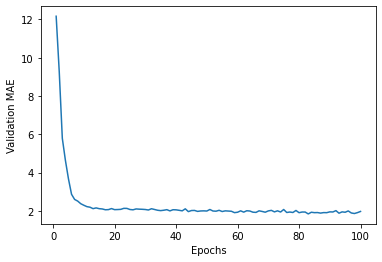

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

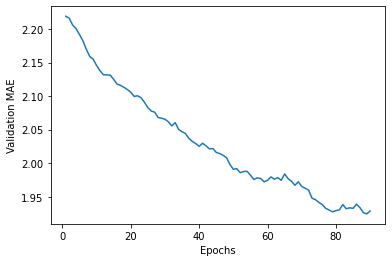

In [17]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [18]:
model = build_model()
model.fit(s_train, l_train, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(s_test, l_test)

2/2 [==============================] - 0s 7ms/step - loss: 9.6195 - mae: 2.0499


In [19]:
test_mae_score

2.0499191284179688